**Analysis of Japanese-Language Proficiency Test (JLPT) Trends and Performance (1984-2023)**

**Author:** Heroshi Joe Abejuela

**Overview:**

The **Japanese-Language Proficiency Test (JLPT)** is a globally recognized assessment that evaluates the proficiency of non-native speakers in Japanese. It is a critical tool for individuals pursuing academic, professional, or personal goals in Japan, serving as a benchmark for language competence.

This analysis aims to provide a comprehensive examination of JLPT trends and performance from **1984 to 2023**. The focus is on understanding the **growth in test participation**, **regional performance differences**, and **future participation forecasts**. By analyzing historical data, the report seeks to offer insights into the JLPT's **global reach**, the **impact of external factors** such as the COVID-19 pandemic, and **performance variations** by location and test level.

Data for this analysis was gathered from the **official JLPT website**, covering several decades. Key findings include **trends in the number of applicants and examinees**, **variations in passing rates by location**, and **average scores across different JLPT levels**. This analysis not only identifies significant patterns and trends but also provides a **forecast for future participation**, contributing valuable insights for educational institutions and test-takers.

In [1]:
# @title **Import libraries**
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [72]:
# @title **Web Scraping Data from the official JLPT Website (1984-2023)**
# URL of the JLPT statistics page
url = "https://www.jlpt.jp/e/statistics/archive.html"

# Request the webpage
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Initialize lists to store table data
years, months, countries_areas, applicants, examinees = [], [], [], [], []

# Locate the table and extract data
rows = soup.find_all('tr')
for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 5:  # Main rows with overall data
        year = cols[0].text.strip()
        years.append(year)
        months.append("Total")
        countries_areas.append(cols[1].text.strip())
        applicants.append(cols[2].text.strip().replace(',', ''))
        examinees.append(cols[3].text.strip().replace(',', ''))
    elif len(cols) == 4:  # Rows with monthly data
        years.append(year)  # Reuse the previous year
        months.append(cols[0].text.strip())
        countries_areas.append(cols[1].text.strip())
        applicants.append(cols[2].text.strip().replace(',', ''))
        examinees.append(cols[3].text.strip().replace(',', ''))

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Month': months,
    'Countries/Areas': countries_areas,
    'Number of Applicants': applicants,
    'Number of Examinees': examinees
})

# Separate the Year and Month
# Identify rows where the Year is actually 'July' or 'December'
df['Month'] = df['Year'].apply(lambda x: 'July' if x == 'July' else ('December' if x == 'December' else 'Total'))
df['Year'] = df['Year'].apply(lambda x: None if x in ['July', 'December'] else x)

# Forward-fill the Year column
df['Year'] = df['Year'].ffill()
df.head()

,Year,Month,Countries/Areas,Number of Applicants,Number of Examinees
0,2023,Total,92,1481023,1265435
1,2023,July,55,698062,602140
2,2023,December,85,782961,663295
3,2022,Total,89,932518,787954
4,2022,July,53,426225,356505


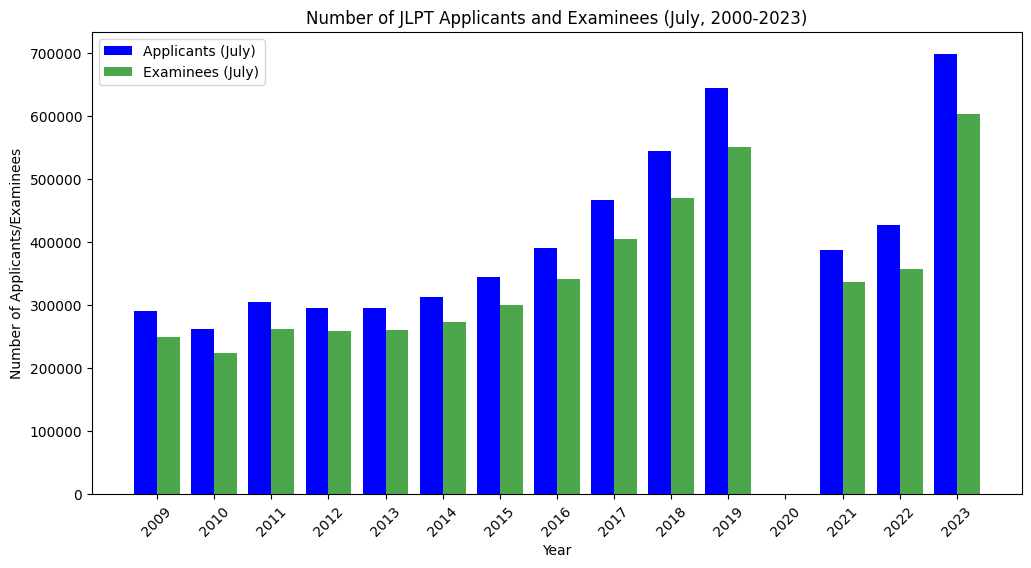

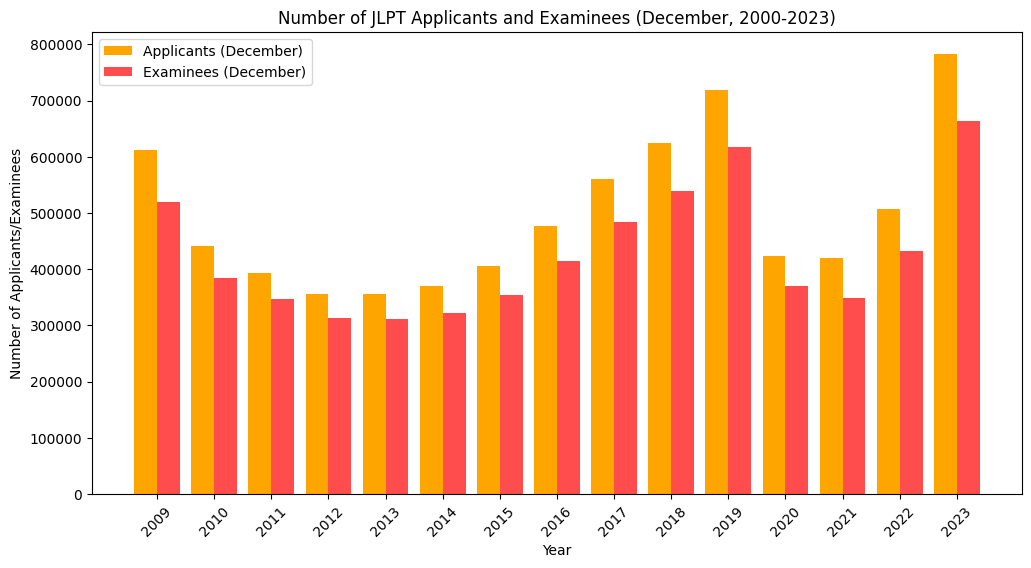

In [73]:
# @title **Number of JLPT Applicants and Examinees from 2009-2023**

# Assuming df is your dataframe and the 'Year' column has been converted to integers
df['Year'] = df['Year'].astype(int)

# Convert 'Number of Applicants' and 'Number of Examinees' to numeric, handling commas
df['Number of Applicants'] = pd.to_numeric(df['Number of Applicants'].str.replace(',', ''), errors='coerce')
df['Number of Examinees'] = pd.to_numeric(df['Number of Examinees'].str.replace(',', ''), errors='coerce')

# Filter the dataframe for relevant years and for the months of December and July
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2023) & (df['Month'].isin(['July', 'December']))]

# Plot for July
plt.figure(figsize=(12, 6))
plt.bar(df_filtered[df_filtered['Month'] == 'July']['Year'] - 0.2,
        df_filtered[df_filtered['Month'] == 'July']['Number of Applicants'],
        width=0.4, label='Applicants (July)', color='blue')

plt.bar(df_filtered[df_filtered['Month'] == 'July']['Year'] + 0.2,
        df_filtered[df_filtered['Month'] == 'July']['Number of Examinees'],
        width=0.4, label='Examinees (July)', color='green', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Applicants/Examinees')
plt.title('Number of JLPT Applicants and Examinees (July, 2000-2023)')
plt.xticks(df_filtered['Year'].unique(), rotation=45)
plt.legend()
plt.grid(False)

plt.show()

# Plot for December
plt.figure(figsize=(12, 6))
plt.bar(df_filtered[df_filtered['Month'] == 'December']['Year'] - 0.2,
        df_filtered[df_filtered['Month'] == 'December']['Number of Applicants'],
        width=0.4, label='Applicants (December)', color='orange')

plt.bar(df_filtered[df_filtered['Month'] == 'December']['Year'] + 0.2,
        df_filtered[df_filtered['Month'] == 'December']['Number of Examinees'],
        width=0.4, label='Examinees (December)', color='red', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Applicants/Examinees')
plt.title('Number of JLPT Applicants and Examinees (December, 2000-2023)')
plt.xticks(df_filtered['Year'].unique(), rotation=45)
plt.legend()
plt.grid(False)

plt.show()

Over the past decade, the Japanese Language Proficiency Test (JLPT) has seen substantial growth, underscoring its rising importance globally. The number of participating countries/areas has expanded significantly, from just 4 in July 2009 to 85 by December 2023, reflecting the test’s growing international reach. The applicant numbers have also surged, with nearly 783,000 people applying in December 2023 alone, highlighting the increasing demand for Japanese language certification. A notable trend is the consistent preference for the December exam, which regularly sees higher participation compared to July, suggesting that candidates align their language goals with year-end opportunities. Despite a temporary dip due to the COVID-19 pandemic, which saw a reduced number of participating areas, the JLPT quickly bounced back, reaffirming its critical role in Japanese language education worldwide.

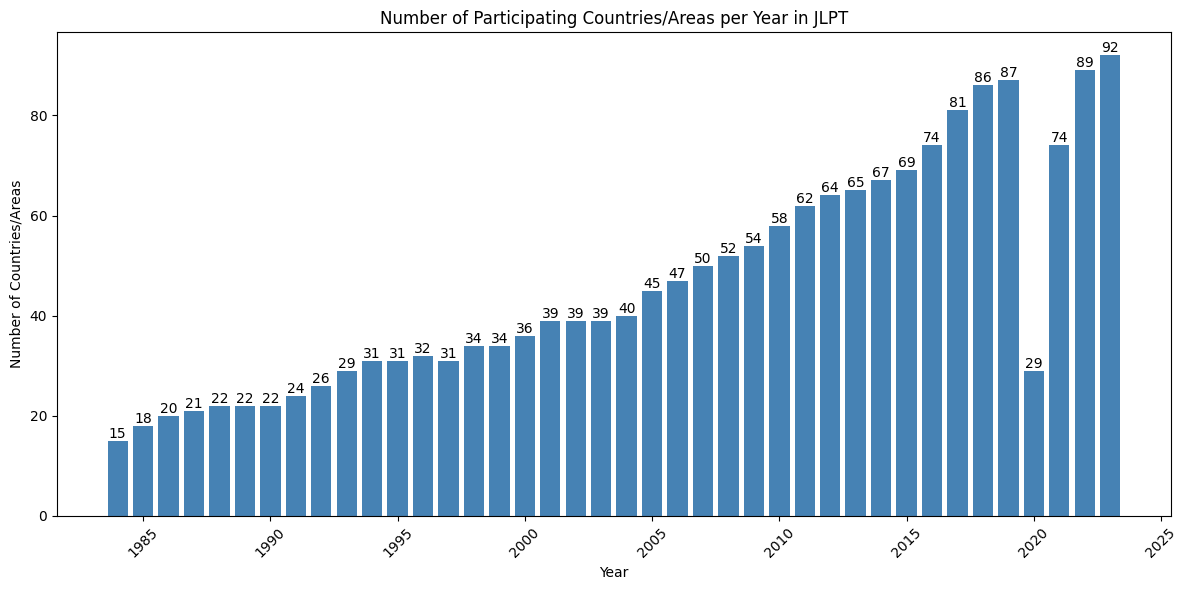

In [76]:
# @title **Number of Participating Countries/Areas per Year in JLPT**
# Filter rows where Month is 'Total'
filtered_df = df[df['Month'] == 'Total']

# Convert 'Countries/Areas' to numeric
filtered_df['Countries/Areas'] = pd.to_numeric(filtered_df['Countries/Areas'].str.replace(',', ''), errors='coerce')

# Prepare data for plotting
yearly_data = filtered_df[['Year', 'Countries/Areas']]

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plot bars
bars = plt.bar(yearly_data['Year'], yearly_data['Countries/Areas'], color='steelblue')

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0 * max(yearly_data['Countries/Areas']),
        int(yval),
        ha='center',
        va='bottom'
    )

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Countries/Areas')
plt.title('Number of Participating Countries/Areas per Year in JLPT')

# Set grid and layout
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

The Japanese Language Proficiency Test (JLPT) has witnessed a steady and significant expansion in the number of participating countries and areas since its inception. Starting with just 15 countries/areas in 1984, the JLPT's reach grew consistently, reflecting the increasing global interest in Japanese language learning.

During the 1980s and early 1990s, the JLPT expanded gradually, reaching 22 countries by 1990 and 31 by 1996. This early growth period established a solid foundation for the test's global presence. The turn of the century marked a more rapid expansion, with the number of participating countries growing from 36 in 2000 to 54 by 2009.

The 2010s were a decade of remarkable growth for the JLPT, as the number of participating countries climbed from 58 in 2010 to 81 in 2017. Despite a temporary decline in 2020, when the COVID-19 pandemic reduced participation to 29 countries, the JLPT quickly recovered, reaching 74 countries by 2021. The upward trajectory continued, culminating in a record 92 participating countries/areas in 2023.

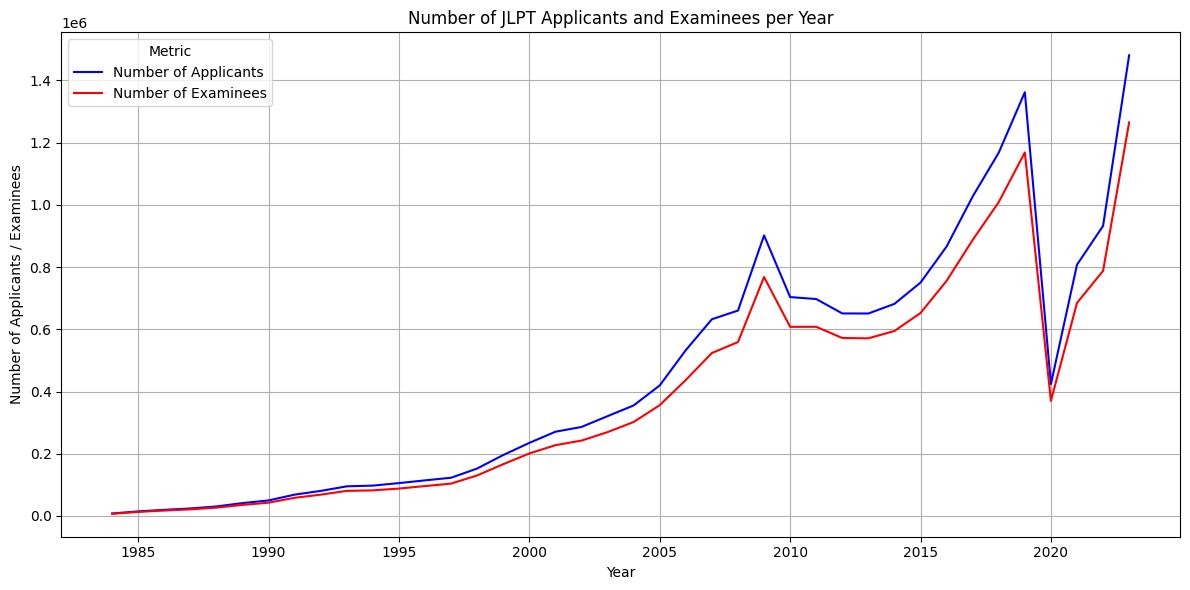

In [79]:
# @title **Number of JLPT Applicants and Examinees per Year**
# Ensure the columns are in numeric format
df['Number of Applicants'] = pd.to_numeric(df['Number of Applicants'])
df['Number of Examinees'] = pd.to_numeric(df['Number of Examinees'])

# Filter the data to include only 'Total' month
total = df[df['Month'] == 'Total']

# Melt the dataframe to have a single 'value' column for the two metrics
melted = total.melt(id_vars=['Year'], value_vars=['Number of Applicants', 'Number of Examinees'],
                    var_name='Metric', value_name='Value')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each metric
for metric, color in zip(['Number of Applicants', 'Number of Examinees'], ['blue', 'red']):
    subset = melted[melted['Metric'] == metric]
    plt.plot(subset['Year'], subset['Value'], color=color, label=metric)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Applicants / Examinees')
plt.title('Number of JLPT Applicants and Examinees per Year')

# Add legend
plt.legend(title='Metric')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Trends:**

- **Steady Growth:** From 1984 to the early 2000s, applicant and examinee numbers steadily increased, surpassing 100,000 by the mid-1990s and 200,000 by 2000.
- **Rapid Expansion:** The early 2000s saw accelerated growth, with applicants exceeding 900,000 by 2009, as the JLPT gained global traction.
- **Pandemic Impact:** In 2020, COVID-19 caused a sharp decline, but participation rebounded quickly afterward.
- **Record Numbers in 2023:** The JLPT hit an all-time high in 2023, with 1.48 million applicants and 1.27 million examinees, reflecting its growing global demand.

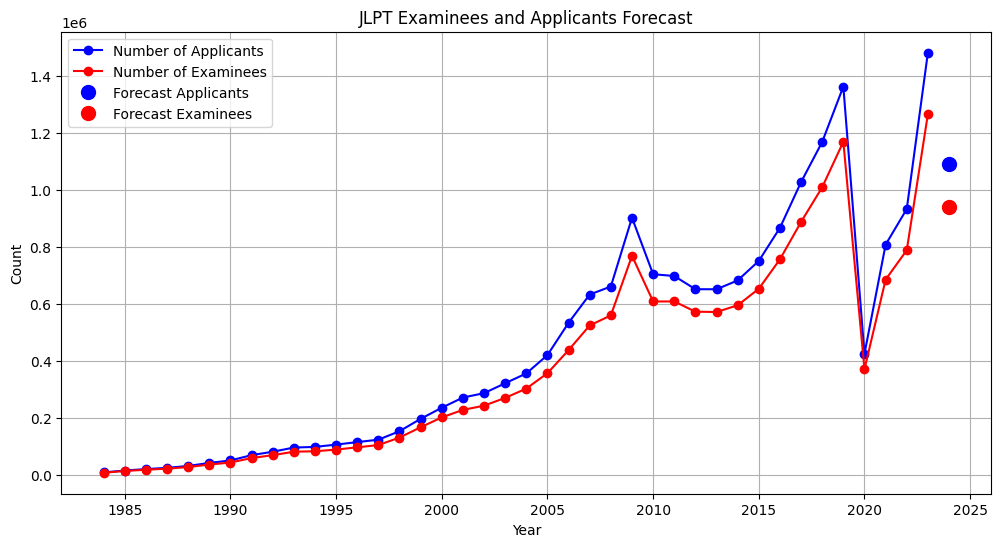

In [81]:
# @title **JLPT Examinees and Applicants Forecast**
# Convert 'Year' column to datetime objects
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Filter data for 'Total' month values
df_filtered = df[df['Month'] == 'Total']

# Convert 'Number of Applicants' and 'Number of Examinees' to numeric type
df_filtered['Number of Applicants'] = pd.to_numeric(df_filtered['Number of Applicants'], errors='coerce')
df_filtered['Number of Examinees'] = pd.to_numeric(df_filtered['Number of Examinees'], errors='coerce')

# Drop rows with missing values
df_filtered = df_filtered.dropna()

# Prepare data for forecasting
df_forecast = df_filtered[['Year', 'Number of Applicants', 'Number of Examinees']].copy()
df_forecast = df_forecast.set_index('Year')

# Prepare data for linear regression
X = df_forecast.index.year.values.reshape(-1, 1)
y_applicants = df_forecast['Number of Applicants']
y_examinees = df_forecast['Number of Examinees']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the model for 'Number of Applicants'
model_applicants = LinearRegression()
model_applicants.fit(X_scaled, y_applicants)

# Create and fit the model for 'Number of Examinees'
model_examinees = LinearRegression()
model_examinees.fit(X_scaled, y_examinees)

# Forecast for the year 2024
forecast_year = np.array([[2024]])
forecast_year_scaled = scaler.transform(forecast_year)

forecast_applicants = model_applicants.predict(forecast_year_scaled)
forecast_examinees = model_examinees.predict(forecast_year_scaled)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Year': pd.to_datetime(['2024']),
    'Number of Applicants': forecast_applicants,
    'Number of Examinees': forecast_examinees
})
forecast_df = forecast_df.set_index('Year')

# Concatenate the original and forecasted DataFrames
combined_df = pd.concat([df_forecast, forecast_df])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_forecast.index, df_forecast['Number of Applicants'], label='Number of Applicants', color='blue', marker='o')
plt.plot(df_forecast.index, df_forecast['Number of Examinees'], label='Number of Examinees', color='red', marker='o')

# Plot forecasted data
plt.plot(forecast_df.index, forecast_df['Number of Applicants'], 'o', color='blue', markersize=10, label='Forecast Applicants')
plt.plot(forecast_df.index, forecast_df['Number of Examinees'], 'o', color='red', markersize=10, label='Forecast Examinees')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('JLPT Examinees and Applicants Forecast')
plt.legend()
plt.grid(True)
plt.show()

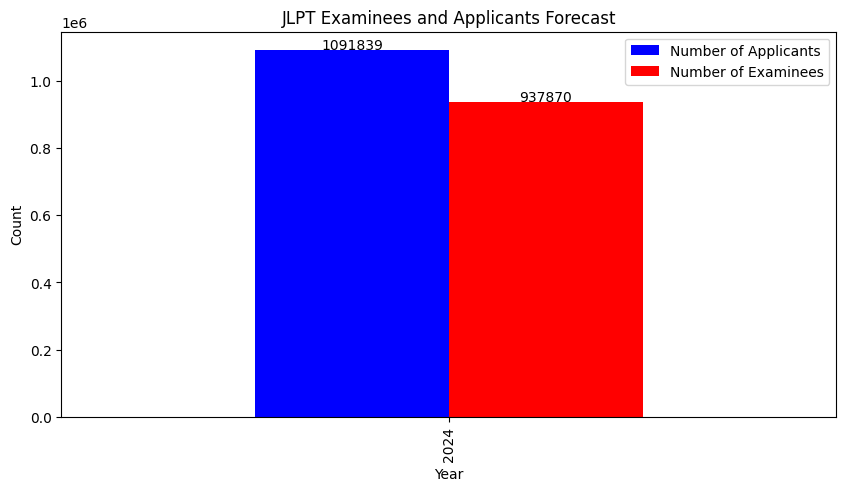

In [82]:
# @title **JLPT Examinees and Applicants Forecast for the year 2024**
#Preprocess data
forecast_df.reset_index(inplace=True)
forecast_df['Year'] = forecast_df['Year'].replace('2024-01-01', 2024)

# Plot forecast data
ax = forecast_df.plot(kind='bar', x='Year', figsize=(10, 5), color=['blue', 'red'])

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points')

# Set title and labels
plt.title('JLPT Examinees and Applicants Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(False)
plt.show()

Logistic regression is a statistical technique used to predict the probability of a binary outcome based on various features. In this case, we used historical data on the number of JLPT applicants and examinees, along with the specific year, as features in the model. By analyzing these features, the logistic regression model forecasts future trends. For 2024, the model predicts approximately 1.09 million applicants and around 937,870 examinees. This prediction reflects a strong and continuing interest in the JLPT, consistent with the growth trends observed in previous years.

In [4]:
# @title **Get July 2023 JLPT Data**
# Define the data
df_final = pd.read_csv("2023_5_1_examinees_data.csv")
df_final.head()

,Category,N1,N2,N3,N4,N5,Total,Location
0,Applicants,"47,043","57,199","63,957","41,566","4,111","213,876",Japan
1,Examinees※,"41,484","52,189","60,570","39,237","3,664","197,144",Japan
2,Certified,"13,349","18,267","25,683","17,993","2,419","77,711",Japan
3,Percentage Certified(%),32.2%,35.0%,42.4%,45.9%,66.0%,39.4%,Japan
4,Applicants,"94,349","109,149","92,816","127,184","60,688","484,186",Overseas


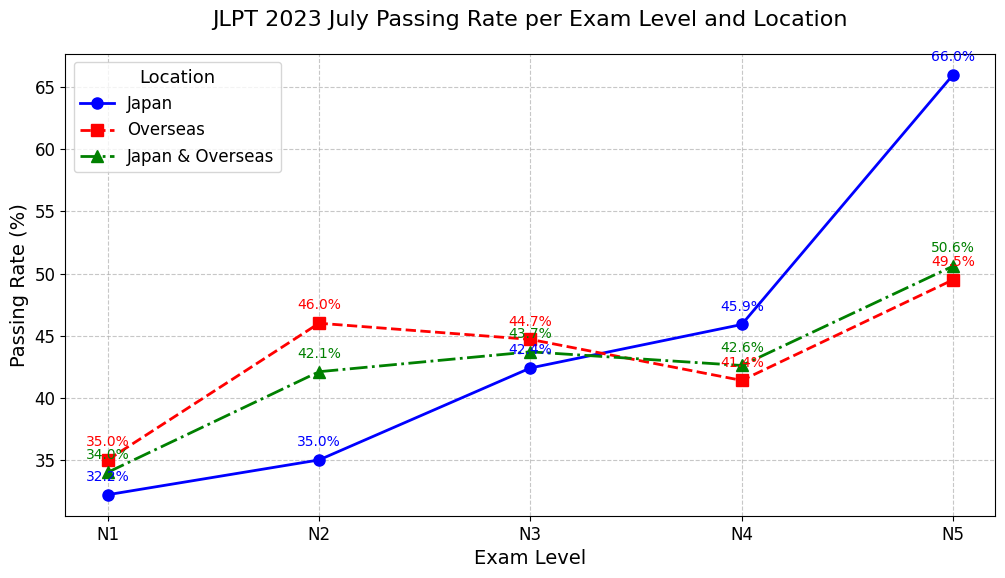

In [6]:
# @title **JLPT 2023 July Passing Rate per Exam Level and Location**
# Define a function to clean and convert the percentage strings to floats
def clean_and_convert_percentage(series):
    return series.str.replace('%', '').astype(float)

# Filter the data for each location
df_japan = df_final[df_final["Location"] == "Japan"]
df_overseas = df_final[df_final["Location"] == "Overseas"]
df_japan_overseas = df_final[df_final["Location"] == "Japan & Overseas"]

# Extract the passing rates directly
passing_rate_japan = clean_and_convert_percentage(df_japan.iloc[3, 1:6])
passing_rate_overseas = clean_and_convert_percentage(df_overseas.iloc[3, 1:6])
passing_rate_japan_overseas = clean_and_convert_percentage(df_japan_overseas.iloc[3, 1:6])

# Plot the passing rates
labels = ["N1", "N2", "N3", "N4", "N5"]
x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.plot(x, passing_rate_japan, marker='o', linestyle='-', color='b', linewidth=2, markersize=8, label="Japan")
plt.plot(x, passing_rate_overseas, marker='s', linestyle='--', color='r', linewidth=2, markersize=8, label="Overseas")
plt.plot(x, passing_rate_japan_overseas, marker='^', linestyle='-.', color='g', linewidth=2, markersize=8, label="Japan & Overseas")

# Customize the ticks and labels
plt.xticks(x, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Exam Level", fontsize=14)
plt.ylabel("Passing Rate (%)", fontsize=14)

# Adding title with customization
plt.title("JLPT 2023 July Passing Rate per Exam Level and Location", fontsize=16, pad=20)

# Adding grid, legend, and background style
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, title="Location", title_fontsize='13', loc='upper left')

# Add data labels
for i, txt in enumerate(passing_rate_japan):
    plt.annotate(f'{txt}%', (x[i], passing_rate_japan.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='blue')
for i, txt in enumerate(passing_rate_overseas):
    plt.annotate(f'{txt}%', (x[i], passing_rate_overseas.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')
for i, txt in enumerate(passing_rate_japan_overseas):
    plt.annotate(f'{txt}%', (x[i], passing_rate_japan_overseas.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='green')

plt.show()

The passing rates for the JLPT reveal notable differences between candidates in Japan and those overseas. In Japan, the rates are generally lower across all levels, with N1 being the most challenging at 32.2%, and N5 the least challenging at 66.0%. This trend indicates that advanced levels are significantly more difficult for domestic candidates.

Conversely, overseas candidates generally experience higher passing rates. For instance, the rate for N1 is 35.0%, surpassing the Japanese rate, and N5 also shows a higher passing rate of 49.5%. This suggests that international candidates might be better prepared or face different challenges compared to those in Japan.

When combining data from both regions, the overall passing rates fall between the Japanese and overseas figures. For example, the combined N1 passing rate is 34.0%, which aligns more closely with the overseas rate than with Japan's. This pattern underscores a broader, more balanced perspective on the exam's difficulty, reflecting a higher success rate globally while still acknowledging the advanced levels' inherent challenges.

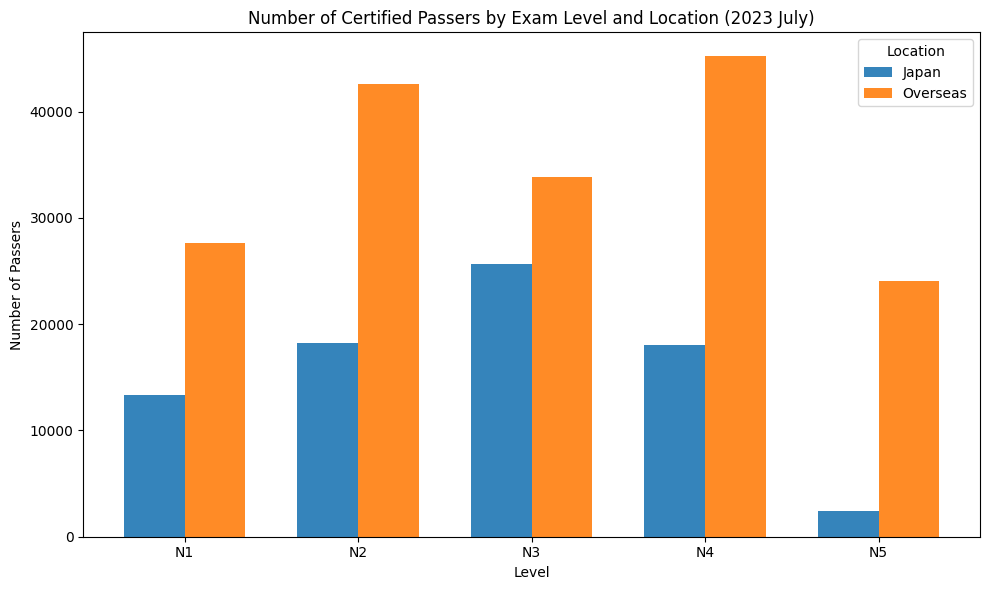

In [10]:
# @title **JLPT Passers by Location (Japan and Overseas) (Levels N1-N5) 2023 July**
# Filter the dataset for certified passers
df_passers = df_final[df_final["Category"] == "Certified"]

# Reshape the data to a long format
df_passers = df_passers.melt(
    id_vars=['Category', 'Location'],
    value_vars=['N1', 'N2', 'N3', 'N4', 'N5'],
    var_name='Level',
    value_name='Passers'
)

# Convert the 'Passers' column to integers
df_passers['Passers'] = df_passers['Passers'].str.replace(',', '').astype(int)

# Define the levels and the width of each bar
levels = ['N1', 'N2', 'N3', 'N4', 'N5']
bar_width = 0.35
index = np.arange(len(levels))

# Create the figure and the bar plot
plt.figure(figsize=(10, 6))

# Separate the data by location
japan_passers = df_passers[df_passers['Location'] == 'Japan']
overseas_passers = df_passers[df_passers['Location'] == 'Overseas']

# Plot the bars for Japan and Overseas side by side
plt.bar(index, japan_passers['Passers'], bar_width, label='Japan', color='#1f77b4', alpha=0.9)
plt.bar(index + bar_width, overseas_passers['Passers'], bar_width, label='Overseas', color='#ff7f0e', alpha=0.9)

# Add labels, title, and ticks
plt.xlabel('Level')
plt.ylabel('Number of Passers')
plt.title('Number of Certified Passers by Exam Level and Location (2023 July)')
plt.xticks(index + bar_width / 2, levels)
plt.legend(title='Location')

# Display the plot
plt.tight_layout()
plt.show()

- **N1 Level:**
  - Japan: 13,349 passers
  - Overseas: 27,626 passers
  - Combined Total: 40,975 passers
  - Overseas candidates have a higher number of passers compared to Japan.

- **N2 Level:**
  - Japan: 18,267 passers
  - Overseas: 42,603 passers
  - Combined Total: 60,870 passers
  - The majority of passers are from overseas, indicating a greater international success rate.

- **N3 Level:**
  - Japan: 25,683 passers
  - Overseas: 33,796 passers
  - Combined Total: 59,479 passers
  - Again, overseas candidates surpass Japanese passers.

- **N4 Level:**
  - Japan: 17,993 passers
  - Overseas: 45,191 passers
  - Combined Total: 63,184 passers
  - The overseas count is significantly higher, showing strong international participation.

- **N5 Level:**
  - Japan: 2,419 passers
  - Overseas: 24,103 passers
  - Combined Total: 26,522 passers
  - Overseas passers make up the vast majority of N5 candidates.

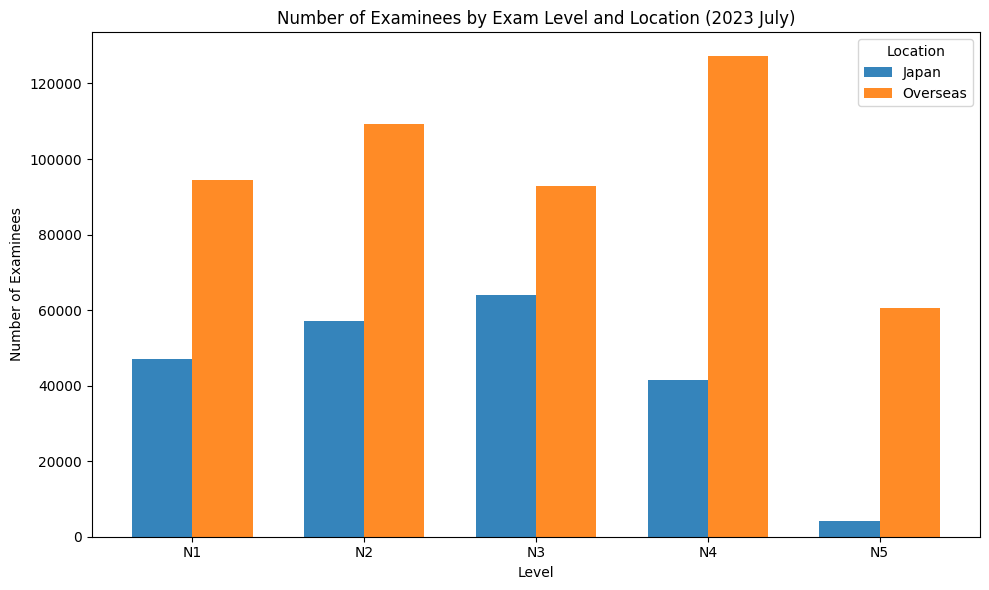

In [11]:
# @title **JLPT Examinees by Location (Japan and Overseas) (Levels N1-N5) 2023 July**
# Filter the dataset for certified passers
df_examinees = df_final[df_final["Category"] == "Applicants"]

# Reshape the data to a long format
df_examinees = df_examinees.melt(
    id_vars=['Category', 'Location'],
    value_vars=['N1', 'N2', 'N3', 'N4', 'N5'],
    var_name='Level',
    value_name='Passers'
)

# Convert the 'Passers' column to integers
df_examinees['Passers'] = df_examinees['Passers'].str.replace(',', '').astype(int)

# Define the levels and the width of each bar
levels = ['N1', 'N2', 'N3', 'N4', 'N5']
bar_width = 0.35
index = np.arange(len(levels))

# Create the figure and the bar plot
plt.figure(figsize=(10, 6))

# Separate the data by location
japan_passers = df_examinees[df_examinees['Location'] == 'Japan']
overseas_passers = df_examinees[df_examinees['Location'] == 'Overseas']

# Plot the bars for Japan and Overseas side by side
plt.bar(index, japan_passers['Passers'], bar_width, label='Japan', color='#1f77b4', alpha=0.9)
plt.bar(index + bar_width, overseas_passers['Passers'], bar_width, label='Overseas', color='#ff7f0e', alpha=0.9)

# Add labels, title, and ticks
plt.xlabel('Level')
plt.ylabel('Number of Examinees')
plt.title('Number of Examinees by Exam Level and Location (2023 July)')
plt.xticks(index + bar_width / 2, levels)
plt.legend(title='Location')

# Display the plot
plt.tight_layout()
plt.show()

- **N1 Level:**
  - **Japan:** 47,043 applicants
  - **Overseas:** 94,349 applicants
  - **Total:** 141,392 applicants
  - The number of applicants is significantly higher overseas, indicating a strong international interest in the N1 level.

- **N2 Level:**
  - **Japan:** 57,199 applicants
  - **Overseas:** 109,149 applicants
  - **Total:** 166,348 applicants
  - Overseas applicants outnumber those in Japan, suggesting greater global engagement with the N2 level.

- **N3 Level:**
  - **Japan:** 63,957 applicants
  - **Overseas:** 92,816 applicants
  - **Total:** 156,773 applicants
  - The pattern of more overseas applicants continues for the N3 level.

- **N4 Level:**
  - **Japan:** 41,566 applicants
  - **Overseas:** 127,184 applicants
  - **Total:** 168,750 applicants
  - Overseas applicants again significantly exceed those in Japan, showing a robust international demand.

- **N5 Level:**
  - **Japan:** 4,111 applicants
  - **Overseas:** 60,688 applicants
  - **Total:** 64,799 applicants
  - The majority of N5 applicants are from overseas, highlighting the global reach of this entry-level exam.

In [42]:
# @title **Average Scores and Standard Deviations JULY 2023**

df_new = pd.read_csv('2023_5_1_avg_and_std_scores.csv')
df_new

# Melt the DataFrame to long format for easier plotting
df_melted = df_new.melt(id_vars=['Scoring sections', 'Location'],
                        value_vars=['N1_Average', 'N1_Standard_Deviation',
                                    'N2_Average', 'N2_Standard_Deviation',
                                    'N3_Average', 'N3_Standard_Deviation',
                                    'N4_Average', 'N4_Standard_Deviation',
                                    'N5_Average', 'N5_Standard_Deviation'],
                        var_name='Score_Type', value_name='Score')

df_melted.head()

,Scoring sections,Location,Score_Type,Score
0,Language Knowledge (Vocabulary/Grammar),Japan,N1_Average,27.7
1,Language Knowledge (Vocabulary/Grammar),Overseas,N1_Average,30.8
2,Language Knowledge (Vocabulary/Grammar),Total,N1_Average,29.7
3,Reading,Japan,N1_Average,28.6
4,Reading,Overseas,N1_Average,29.6


In [85]:
# @title **Total average scores per section by location**
df_filtered = df_melted[df_melted['Score_Type'].str.contains('Average')]
df_filtered = df_filtered.replace({'Scoring sections': {'Language Knowledge (Vocabulary/Grammar) & Reading': 'Lang. Knowledge & Reading',
                                                          'Language Knowledge (Vocabulary/Grammar)': 'Lang. Knowledge'}})

alt.Chart(df_filtered).mark_bar().encode(
    x='Location',
    y='Score',
    color='Location',
    column='Scoring sections'
).properties(
    width=250,
    height=350
)

alt.Chart(...)

The data reveals notable differences in performance between candidates taking the JLPT N1 to N5 levels in Japan and overseas. For the N1 level, overseas candidates generally score higher in Language Knowledge and Reading sections, whereas Japanese candidates perform better in Listening. The total scores for N1 are nearly identical across locations, with a slight advantage for overseas candidates. At the N2 level, overseas candidates again show superior performance in Language Knowledge and Reading, while Japanese candidates excel in Listening. Total scores for N2 are higher overseas. For the N3 level, similar trends are observed: overseas candidates excel in Language Knowledge and Reading, while Japanese candidates score better in Listening. Total scores for N3 are higher overseas as well. At the N4 level, overseas candidates achieve better results in Language Knowledge and Reading, while Japanese candidates perform better in Listening. The total scores for N4 are slightly higher in Japan. For N5, Japanese candidates outperform their overseas counterparts in Language Knowledge & Reading and Listening, with total scores also being higher in Japan. Overall, the data highlights regional differences in strengths and weaknesses across the JLPT levels, with varying performance trends in different scoring sections.

In [60]:
df_filtered[df_filtered['N_Level'].isin(['N1', 'N5'])].groupby(['Scoring sections', 'N_Level'])['Score'].mean()

Scoring sections           N_Level
Lang. Knowledge            N1         29.400000
                           N5               NaN
Lang. Knowledge & Reading  N1               NaN
                           N5         56.400000
Listening                  N1         32.766667
                           N5         30.333333
Reading                    N1         29.166667
                           N5               NaN
Total Score                N1         91.333333
                           N5         86.000000
Name: Score, dtype: float64

- **Language Knowledge**: For N1, the average score is 29.4, reflecting the advanced level of detail and understanding required. In contrast, N5 does not have a separate score for this section due to its combined nature with other sections.
  
- **Language Knowledge & Reading**: N5 scores 56.4 in this combined section, indicating a more integrated approach at this level. For N1, detailed scores are not available, but the complexity of the section suggests a higher expectation.

- **Listening**: N1 averages 32.77, demonstrating a higher proficiency in listening skills compared to N5, which has an average score of 30.33.

- **Reading**: The reading score for N1 is 29.17. However, N5 does not have a specific score for reading due to the combined assessment format.

- **Total Score**: The total average score for N1 is 91.33, significantly higher than N5’s total of 86.00, reflecting the greater difficulty and depth required at the N1 level.

### **Conclusion**

This analysis provides a detailed examination of the Japanese-Language Proficiency Test (JLPT) from 1984 to 2023, focusing on participation trends, regional performance, and forecasts. **Key findings include a steady increase** in both applicants and examinees over the years, with a significant surge in participation up to 2009. A temporary decline in 2020, due to the COVID-19 pandemic, was followed by a swift recovery, demonstrating the JLPT’s **resilience and enduring global appeal**.

The analysis of participation trends reveals that the JLPT has expanded its reach substantially, with a growing number of **participating countries and regions each year**. Forecasting using logistic regression suggests that the number of examinees and applicants will continue to rise in 2024, indicating **sustained global interest** in Japanese language proficiency.

The July 2023 data shows that **passing rates and average scores** differ between Japan and overseas locations. Specifically, **overseas candidates outperformed in Language Knowledge and Reading**, while Japanese candidates excelled in Listening. These differences may reflect **regional variations in test preparation and educational resources**.

The assessment of average scores and standard deviations highlights performance patterns across different JLPT levels. These insights reveal **regional strengths and areas for improvement**, offering valuable information for both educators and test-takers. Overall, this analysis underscores the JLPT’s **expanding international footprint** and provides actionable insights into performance trends, contributing to more informed educational strategies and future research.